In [0]:
# Filtado de mensajes spam

## Descripción del problema real

La recepción de publicidad no deseada a traves mensajes de texto usando SMS (Short Message Service) es un problema que afecta a muchos usuarios de teléfonos móviles. El problema radica en que los usuarios deben pagar por los mesajes recibidos, y por este motivo resulta muy importante que las compañías prestadoras del servicio puedan filtrar mensajes indeseados antes de enviarlos a su destinatario final. Los mensajes tienen una longitud máxima de 160 caracteres, por lo que el texto resulta poco para realizar la clasificación, en comparación con textos más largos (como los emails). Adicionalmente, los errores de digitación dificultan el proceso de detección automática.

## Descripción del problema en términos de los datos

Se tiene una muestra contiene 5574 mensajes en inglés, no codificados y clasificados como legítimos (ham) o spam (http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). La información está almacenada en el archivo `datos/spam-sms.zip`.El problema en términos de los datos consiste en clasificar si un mensaje SMS es legítico o spam, a partir del análisis de las palabras que contiente, partiendo del supuesto de que ciertas palabras que son más frecuentes dependiendo del tipo de mensaje. Esto implica que en la fase de preparación de los datos se deben extraer las palabras que contiene cada mensaje para poder realizar el análsis.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de redes neuronales artificiales y otras técnicas estadísticas para realizar la clasificación.

## Requerimientos

Usted debe:

* Preprocesar los datos para representarlos usando bag-of-words.


* Construir un modelo de regresión logística como punto base para la comparación con otros modelos más complejos.


* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.


* Presentar métricas de desempeño para establecer las bondades y falencias de cada clasificador.

In [5]:
##En orden de ejecutar el trabajo, es indispensable que la carpeta "Redes Neuronales y Algoritmos Bioinspirados - Trabajo Final",
##que se adjunta con éste archivo, debe ser agregada a "Mi Unidad" en su propio drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import glob
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df = pd.read_csv('/content/drive/My Drive/Redes Neuronales y Algoritmos Bioinspirados - Trabajo Final/datos/SMSSpamCollection.txt',delimiter='\t',names=['type','text'])

In [0]:
df["type"].replace({"ham": "0", "spam": "1"}, inplace=True)
x = df['text']
y = df['type']

In [0]:
##Procesamiento del lenguaje neutral
stemmer = SnowballStemmer("english")

def cleanText(message):   
   
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    return " ".join(words)
    
X = list(map(cleanText, x))

In [0]:
##Bag of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [10]:
X.shape

(5572, 8098)

In [11]:
X = X.toarray()

X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
##Modelo (Regresión Logistica)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify = y, test_size = 0.3,random_state=101)
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1443,    5],
       [  31,  193]])

In [13]:
print(accuracy_score(y_test, y_pred))

0.9784688995215312


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.86      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [0]:
##Clasificador con redes neuronales


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [16]:
def grid_layers(capas):
    param = []

    for i in range(len(capas)):

        classifier = tf.keras.Sequential()

        classifier.add(layers.Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8098))

        for j in range(capas[i]-1):

            classifier.add(layers.Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

        classifier.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

        classifier.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

        classifier.fit(X_train, y_train, batch_size = 50, epochs = 30)

        y_pred = classifier.predict(X_test)

        y_pred = (y_pred > 0.5)

        cm = confusion_matrix(y_test, y_pred)

        param.append([classifier.summary(),cm,classifier.evaluate(X_test, y_test)])

    return param

layersx = [2,5,8]

resultado = grid_layers(layersx)

Epoch 1/30
78/78 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8641
Epoch 2/30
78/78 [==============================] - 0s 5ms/step - loss: 0.1291 - accuracy: 0.9026
Epoch 3/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0845 - accuracy: 0.9962
Epoch 4/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9990
Epoch 5/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9997
Epoch 6/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 1.0000
Epoch 7/30
78/78 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 8/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 9/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 10/30
78/78 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 11/30
78/78 [

In [17]:
resultado

[[None, array([[1448,    0],
         [  23,  201]]), [0.12936080992221832, 0.9862440228462219]],
 [None, array([[1448,    0],
         [  26,  198]]), [0.21874511241912842, 0.9844497442245483]],
 [None, array([[1444,    4],
         [  26,  198]]), [0.3445158302783966, 0.9820573925971985]]]

In [0]:
precision = [i[2][1] for i in resultado]

<BarContainer object of 3 artists>

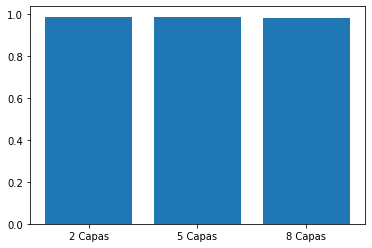

In [19]:
plt.bar(["2 Capas","5 Capas","8 Capas"],precision)

In [20]:
def grid_neurons(neuronas):

    param = []
  
    for i in range(len(neuronas)):
    
        classifier = tf.keras.Sequential()

        classifier.add(layers.Dense(units = neuronas[i], kernel_initializer = 'uniform', activation = 'relu', input_dim = 8098))

        classifier.add(layers.Dense(units = neuronas[i], kernel_initializer = 'uniform', activation = 'relu'))

        classifier.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

        classifier.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

        classifier.fit(X_train, y_train, batch_size = 32, epochs = 30)

        y_pred = classifier.predict(X_test)

        y_pred = (y_pred > 0.5)

        cm = confusion_matrix(y_test, y_pred)

        param.append([classifier.summary(),cm,classifier.evaluate(X_test, y_test)])

    return param

neurons = [8,16,32,64]

resultado_neuronas = grid_neurons(neurons)

Epoch 1/30
122/122 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.8590
Epoch 2/30
122/122 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9726
Epoch 3/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9967
Epoch 4/30
122/122 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9992
Epoch 5/30
122/122 [==============================] - 1s 4ms/step - loss: 0.0256 - accuracy: 0.9995
Epoch 6/30
122/122 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.9997
Epoch 7/30
122/122 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 8/30
122/122 [==============================] - 0s 4ms/step - loss: 4.2596e-04 - accuracy: 1.0000
Epoch 9/30
122/122 [==============================] - 0s 4ms/step - loss: 1.2852e-04 - accuracy: 1.0000
Epoch 10/30
122/122 [==============================] - 0s 4ms/step - loss: 8.2850e-05 - accu

In [22]:
resultado_neuronas

[[None, array([[1446,    2],
         [  16,  208]]), [0.1299692690372467, 0.989234447479248]],
 [None, array([[1445,    3],
         [  18,  206]]), [0.1541954129934311, 0.9874401688575745]],
 [None, array([[1428,   20],
         [  14,  210]]), [0.140886127948761, 0.9796651005744934]],
 [None, array([[1447,    1],
         [  21,  203]]), [0.16790522634983063, 0.9868420958518982]]]

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def regresor_base(optimizer,activation):
    modelo = tf.keras.Sequential()
    modelo.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = activation, input_dim = 8098))
    modelo.add(layers.Dropout(rate = 0.1))
    modelo.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    modelo.add(layers.Dropout(rate = 0.1))
    modelo.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    modelo.compile(optimizer = optimizer, loss = 'binary_crossentropy' ,metrics = ['acc'])
    
    return  modelo


regresor = KerasClassifier(build_fn = regresor_base)

parameters = {'batch_size': [5,10],
              'epochs': [20,40],
              'optimizer': [tf.keras.optimizers.Adam(0.01)],
              'activation':['sigmoid','relu']              
             }

## Cross validation 
grid_search = GridSearchCV(estimator = regresor,
                           param_grid = parameters,
                           cv=2
                           )
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/20
390/390 [==============================] - 1s 2ms/step - loss: 0.3259 - acc: 0.8621
Epoch 2/20
390/390 [==============================] - 1s 2ms/step - loss: 0.1216 - acc: 0.9492
Epoch 3/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0498 - acc: 0.9949
Epoch 4/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0244 - acc: 0.9995
Epoch 5/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0173 - acc: 0.9995
Epoch 6/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0133 - acc: 0.9995
Epoch 7/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0100 - acc: 0.9995
Epoch 8/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0097 - acc: 0.9995
Epoch 9/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0096 - acc: 0.9990
Epoch 10/20
390/390 [==============================] - 1s 2ms/step - loss: 0.0085 - acc: 0.9995
Epoch 11/20
390/390 [============================

RuntimeError: ignored

In [0]:
##Se logra una precisión en el cross validation de 91%

In [26]:
resultado_neuronas

[[None, array([[1446,    2],
         [  16,  208]]), [0.1299692690372467, 0.989234447479248]],
 [None, array([[1445,    3],
         [  18,  206]]), [0.1541954129934311, 0.9874401688575745]],
 [None, array([[1428,   20],
         [  14,  210]]), [0.140886127948761, 0.9796651005744934]],
 [None, array([[1447,    1],
         [  21,  203]]), [0.16790522634983063, 0.9868420958518982]]]

In [27]:
neurons

[8, 16, 32, 64]

In [0]:
loss = [i[-1][0] for i in resultado_neuronas]
precission = [i[-1][1] for i in resultado_neuronas]

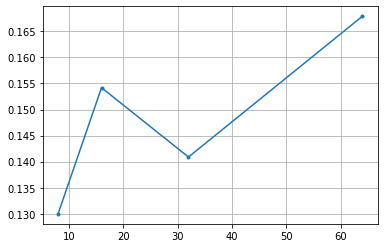

In [29]:
plt.plot(neurons, loss , '.-')
plt.grid()

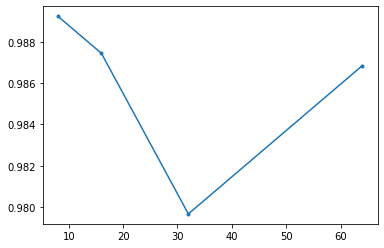

In [30]:
plt.plot(neurons, precission , '.-')

In [34]:
## Modelo final con hyper parametros ajustados
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
classifier = tf.keras.Sequential()

classifier.add(layers.Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 8098))

classifier.add(layers.Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=5, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=1)

classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)

Epoch 1/100
780/780 [==============================] - 2s 2ms/step - loss: 0.1955 - accuracy: 0.9213
Epoch 2/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.9933
Epoch 3/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0103 - accuracy: 0.9979
Epoch 4/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 0.9995
Epoch 5/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 6/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 7/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 8/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 9/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 10/100
780/780 [==============================] - 2s 2ms/step - loss: 0.0028 - accura

In [35]:
##Resultado redes neuronales
cm = confusion_matrix(y_test, y_pred)
cm

array([[1437,   11],
       [  11,  213]])

In [36]:
classifier.evaluate(X_test, y_test)

53/53 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9868


[0.17599910497665405, 0.9868420958518982]

In [0]:
##Resultado regresion
array([[1443,    5],
       [  31,  193]])

In [0]:
#Los resultados son muy similares, conllevando más trabajo las redes neuronales.